# Mathematical Image Analysis Final Project: Dataset Augmentation

## import libraries

In [ ]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

## import sample image

In [ ]:
# Load the image using OpenCV (note: this loads in BGR format)
img = cv2.imread('motorcycle.jpg')
# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Motorcycle Image')
plt.axis('on')
plt.show()

# get image as numpy array
img_array = np.array(img_rgb)

## helper functions

In [ ]:
# changing exposure/brightness {brightening (1.5)}
def change_brightness(image, factor):
    """
    Change the brightness of an image by multiplying pixel values by a factor.
    :param image: Input image (numpy array)
    :param factor: Brightness factor (1.0 = no change, <1.0 = darker, >1.0 = brighter)
    :return: Brightened image (numpy array)
    """
    # Create brightened versions of the image with different intensity factors
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')

    # Increase brightness by multiplying pixel values
    # Clip to ensure values stay within valid range (0-255)
    brightened = np.clip(image.astype(float) * factor, 0, 255).astype(np.uint8)

    # Display the brightened image
    plt.imshow(brightened)
    plt.title(f'Brightness factor: {factor}')
    plt.axis('on')

    plt.tight_layout()
    plt.show()

    return brightened

In [ ]:
def change_contrast(image, factor):
    """
    Change the contrast of an image by adjusting pixel values around the mean.
    
    :param image: Input image (numpy array)
    :param factor: Contrast factor (1.0 = no change, <1.0 = lower contrast, >1.0 = higher contrast)
    :return: Contrast adjusted image (numpy array)
    """
    # Calculate the mean pixel value as the reference point
    mean = np.mean(image, axis=(0, 1))
    
    # Adjust the contrast by moving pixel values away from or toward the mean
    # Formula: new_pixel = mean + factor * (old_pixel - mean)
    adjusted = mean + factor * (image.astype(float) - mean)
    
    # Clip to ensure values stay within valid range (0-255)
    adjusted = np.clip(adjusted, 0, 255).astype(np.uint8)
    
    # Display the original and contrast-adjusted images
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')
    
    # Contrast adjusted image
    plt.subplot(1, 2, 2)
    plt.imshow(adjusted)
    plt.title(f'Contrast factor: {factor}')
    plt.axis('on')
    
    plt.tight_layout()
    plt.show()
    
    return adjusted

In [ ]:
def change_saturation(image, factor):
    """
    Change the saturation of an image by converting to HSV, adjusting saturation, and converting back to RGB.
    
    :param image: Input image (numpy array)
    :param factor: Saturation factor (1.0 = no change, <1.0 = less saturated, >1.0 = more saturated)
    :return: Saturation adjusted image (numpy array)
    """
    # Convert the image from RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Adjust the saturation channel
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * factor, 0, 255)
    
    # Convert back to RGB
    adjusted = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    
    # Display the original and saturation-adjusted images
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')
    
    # Saturation adjusted image
    plt.subplot(1, 2, 2)
    plt.imshow(adjusted)
    plt.title(f'Saturation factor: {factor}')
    plt.axis('on')
    
    plt.tight_layout()
    plt.show()
    
    return adjusted

## Point operations (I.4):  

### low brightness

In [ ]:
lower_brightness = change_brightness(img_rgb, 0.5)

### high brightness

In [ ]:
higher_brightness = change_brightness(img_rgb, 2)

### high contrast

In [ ]:
# contrast enhancement (I.6)
high_contrast = change_contrast(img_rgb, 2.0)

### low contrast

In [ ]:
low_contrast = change_contrast(img_rgb, 0.6)

### high saturation

In [ ]:
# enhancing saturation
high_saturation = change_saturation(img_rgb, 5.0)

### black & white

In [ ]:
# converting to black and white
black_white = change_saturation(img_rgb, 0.0)

In [ ]:
# Introducing random salt and pepper noise


# Filtering using convolution (I.7, 15)

In [ ]:
def convolution2d(image, kernel, stride=1):
    """
    Helper function to perform a 2D convolution on an image with a given kernel.
    Parameters:
    - image: 2D numpy array representing the input image
    - kernel: 2D numpy array representing the convolution kernel
    - stride: integer, the step size for the convolution (1)
    Returns:
    - output: 2D numpy array representing the convolved image
    """
    
    # get dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # pads to keep output the same size as input
    pad_h = (kernel_height - 1) // 2
    pad_w = (kernel_width - 1) // 2

    # output array
    output_height = (image_height - kernel_height + 2 * pad_h) // stride + 1
    output_width = (image_width - kernel_width + 2 * pad_w) // stride + 1

    output = np.zeros((output_height, output_width))
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    # convolve image and filter
    for y in range(output_height):
        for x in range(output_width):
            region = padded_image[y * stride:y * stride + kernel_height,
                                  x * stride:x * stride + kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

In [ ]:
# Gaussian Blur (example of weighted averaging filter (I.12))
def gaussian_blur(image, kernel_size=9, sigma=1.0):
    """
    Apply Gaussian blur to an image using a Gaussian kernel (handles RGB images).
    Parameters:
    - image: 2D numpy array representing the input image
    - kernel_size: size of the Gaussian kernel (must be odd)
    - sigma: standard deviation of the Gaussian distribution
    Returns:
    - blurred_image: 2D numpy array representing the blurred image
    """
    
    # set up the kernel
    gaussian_blur_kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    for x in range(kernel_size):
        for y in range(kernel_size):
            gaussian_blur_kernel[x, y] = (1 / (2 * np.pi * sigma ** 2)) * \
                np.exp(-((x - center) ** 2 + (y - center) ** 2) / (2 * sigma ** 2))
    gaussian_blur_kernel /= np.sum(gaussian_blur_kernel)

    # handle grayscale and RGB images
    if image.ndim == 2:
        return convolution2d(image, gaussian_blur_kernel)
    elif image.ndim == 3:
        blurred_channels = [
            convolution2d(image[:, :, c], gaussian_blur_kernel)
            for c in range(image.shape[2])
        ]
        return np.stack(blurred_channels, axis=-1)
    

# test the Gaussian blur function
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(cv2.GaussianBlur(img_rgb, (9, 9), sigmaX=1.0))
plt.title("OpenCV Blur")

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur(img_rgb, kernel_size=9, sigma=1.0).astype(np.uint8))
plt.title("Manual Blur")

plt.tight_layout()
plt.show()

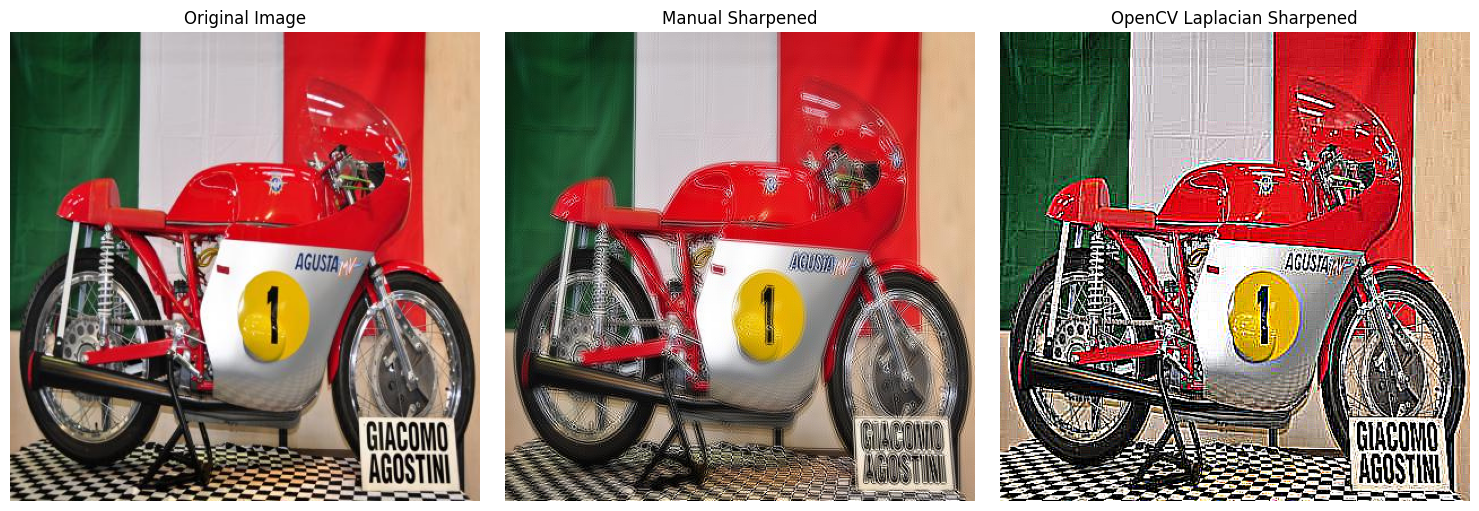

In [ ]:
# Sharpen the image (I.57)
def sharpen_image(image):
    """
    Sharpen the image using a Laplacian kernel.
    Parameters:
    - image: 2D numpy array representing the input image
    Returns:
    - sharpened_image: 2D numpy array representing the sharpened image
    """
    # define kernel
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]], dtype=np.float32)

    if image.ndim == 3:
        sharpened = np.stack([
            image[:, :, c] - convolution2d(image[:, :, c], laplacian_kernel)
            for c in range(image.shape[2])
        ], axis=-1)
    else:
        sharpened = image - convolution2d(image, laplacian_kernel)

    return np.clip(sharpened, 0, 255).astype(np.uint8)


# get openCV Laplacian sharpened image in rgb
def opencv_sharpen(image):
    """
    Sharpen the image using OpenCV's Laplacian operator. Handles RGB images.
    Parameters:
    - image: 3D numpy array (RGB image)
    Returns:
    - sharpened_image: 3D numpy array (sharpened RGB image)
    """
    # convert to float for precisions
    image = image.astype(np.float32)  
    # apply Laplacian on each channel (R, G, B)
    sharpened_image = np.zeros_like(image)
    for c in range(image.shape[2]): 
        laplacian = cv2.Laplacian(image[:, :, c], cv2.CV_32F, ksize=3)
        sharpened_image[:, :, c] = image[:, :, c] - laplacian

    # return the sharpened image as integer data 
    return np.clip(sharpened_image, 0, 255).astype(np.uint8)

# test the sharpen function
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpen_image(img_rgb))
plt.title("Manual Sharpened")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_sharpen(img_rgb))
plt.title("OpenCV Laplacian Sharpened")
plt.axis('off')

plt.tight_layout()
plt.show()

# Other (from linear algebra review):


In [ ]:
# Fixed/Random rotation

In [ ]:
# Shearing; typically padded with 0s (I.9), change in basis

In [ ]:
# Flipping image (reflection) 